In [73]:
# !pip3 install netCDF4
# !pip3 install matplotlib
# !pip3 install statsmodels
import netCDF4
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import statsmodels.api as sm

filepath = "/Users/yaolin/OneDrive - NTNU/MASCOT_PhD/Data/Nidelva/SINMOD_DATA/samples_2022.05.04.nc"


In [33]:
sinmod = netCDF4.Dataset(filepath)
ref_timestamp = datetime.strptime("2022.05.04", "%Y.%m.%d").timestamp()
timestamp = np.array(sinmod["time"]) * 24 * 3600 + ref_timestamp #change ref timestamp
lat_sinmod = np.array(sinmod['gridLats'])
lon_sinmod = np.array(sinmod['gridLons'])
depth_sinmod = np.array(sinmod['zc'])
salinity_sinmod = np.array(sinmod['salinity'])

array([1.6516152e+09, 1.6516158e+09, 1.6516164e+09, 1.6516170e+09,
       1.6516176e+09, 1.6516182e+09, 1.6516188e+09, 1.6516194e+09,
       1.6516200e+09, 1.6516206e+09, 1.6516212e+09, 1.6516218e+09,
       1.6516224e+09, 1.6516230e+09, 1.6516236e+09, 1.6516242e+09,
       1.6516248e+09, 1.6516254e+09, 1.6516260e+09, 1.6516266e+09,
       1.6516272e+09, 1.6516278e+09, 1.6516284e+09, 1.6516290e+09,
       1.6516296e+09, 1.6516302e+09, 1.6516308e+09, 1.6516314e+09,
       1.6516320e+09, 1.6516326e+09, 1.6516332e+09, 1.6516338e+09,
       1.6516344e+09, 1.6516350e+09, 1.6516356e+09, 1.6516362e+09,
       1.6516368e+09, 1.6516374e+09, 1.6516380e+09, 1.6516386e+09,
       1.6516392e+09, 1.6516398e+09, 1.6516404e+09, 1.6516410e+09,
       1.6516416e+09, 1.6516422e+09, 1.6516428e+09, 1.6516434e+09,
       1.6516440e+09, 1.6516446e+09, 1.6516452e+09, 1.6516458e+09,
       1.6516464e+09, 1.6516470e+09, 1.6516476e+09, 1.6516482e+09,
       1.6516488e+09, 1.6516494e+09, 1.6516500e+09, 1.6516506e

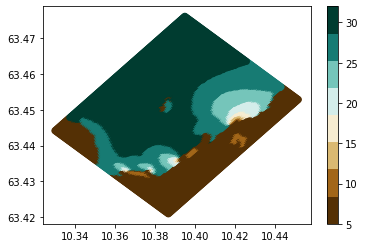

In [129]:
plt.scatter(lon_sinmod, lat_sinmod, c=salinity_sinmod[4, 0, :, :], cmap=get_cmap("BrBG", 8), vmin=5, vmax=32)
plt.colorbar()


In [116]:
ind_valid = np.where(salinity_sinmod[0, 0, :, :]>0)
sal_selected = salinity_sinmod[:, 0, ind_valid[0], ind_valid[1]]
ar1_coef = []
for i in range(sal_selected.shape[1]):
#     print(i)
    sal_sample = sal_selected[:, i]
#     ar1_coef.append([0])
    ar1_coef.append(sm.tsa.acf(sal_sample)[1])
ar1_coef = np.array(ar1_coef)
print("original: ", len(ar1_coef))
ind_valid_coef = np.where(~np.isnan(ar1_coef))[0]
print("ind: ", len(ind_valid_coef))
ar1_coef = ar1_coef[ind_valid_coef]

original:  13218
ind:  13145


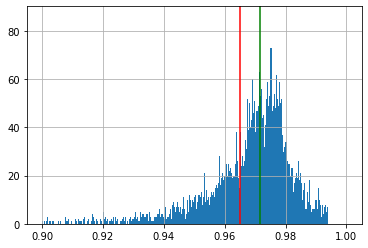

Selected AR1 coef: 0.9650243598058739


In [139]:
plt.hist(ar1_coef, bins=1000, range=(.9, 1.0))
# plt.axvline(.9)
plt.axvline(np.mean(ar1_coef), color='red')
plt.axvline(np.median(ar1_coef), color='green')
plt.grid()
plt.show()
# np.mean(ar1_coef)
print("Selected AR1 coef:", np.mean(ar1_coef))

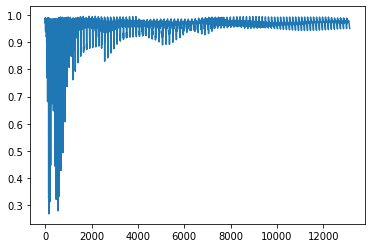

In [128]:
plt.plot(ar1_coef)

AttributeError: 'tuple' object has no attribute 'shape'

[1.         0.98981899 0.97805352 0.96505692 0.95113854 0.93683858
 0.92194192 0.90642969 0.88997839 0.87275449 0.85470457 0.83587261
 0.81672972 0.79704818 0.77698349 0.75676015 0.73613475 0.71551872
 0.69510837 0.674508   0.65351819 0.63266025]


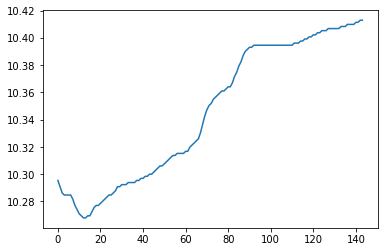

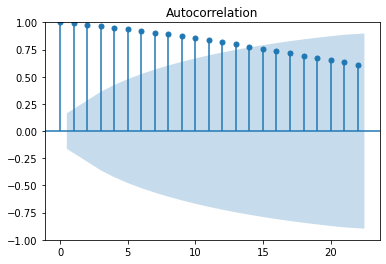

In [75]:
sal_selected.shape
sal_t = sal_selected[:, 30]
plt.plot(sal_t)
print(sm.tsa.acf(sal_t))
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(sal_t)

In [62]:
sal_selected.shape

(144, 13218)

In [138]:
print(datetime.fromtimestamp(timestamp[0]))
print(datetime.fromtimestamp(timestamp[1]))
print(datetime.fromtimestamp(timestamp[2]))
print(datetime.fromtimestamp(timestamp[-1]))

2022-05-04 00:00:00
2022-05-04 00:10:00
2022-05-04 00:20:00
2022-05-04 23:50:00
